In [1]:
import pandas as pd
import json
import numpy as np
import os

# Konfigureerime Pandase sätteid loetavuse huvides
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Sisend- ja väljundfailid
INPUT_FILE = 'tehisintellekti-rakendamise-projekt/andmed/toorandmed_aasta.csv'
OUTPUT_FILE = 'tehisintellekti-rakendamise-projekt/andmed/andmed_aasta.csv'


if os.path.exists(INPUT_FILE):
    df = pd.read_csv(INPUT_FILE, low_memory=False)
    print(f"Toorandmed loetud. Andmestiku suurus: {df.shape[0]} rida, {df.shape[1]} veergu.")
else:
    # Kui faili pole, loome testimiseks tühja DataFrame'i või viskame vea
    raise FileNotFoundError(f"Viga: Sisendfaili '{INPUT_FILE}' ei leitud! Kontrolli failiteed.")

# Kiire pilk andmestruktuurile
df.head(2)

print("Samm 1: Teegid laetud ja seadistused tehtud. Andmed sisse loetud.")

Toorandmed loetud. Andmestiku suurus: 3156 rida, 229 veergu.
Samm 1: Teegid laetud ja seadistused tehtud. Andmed sisse loetud.


In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv(INPUT_FILE, low_memory=False)

# Whitelist of columns to keep 
columns_to_keep = [
    "code",
    "credits",
    "additional_info__prerequisites",
    "overview__description__en",
    "overview__description__et",
    "overview__learning_outcomes_text_en",
    "overview__learning_outcomes_text_et",
    "title__en",
    "title__et",
    "version__target__language__et",
    "version__target__semester__et",
    "additional_info__assessment_scale__et",
    "version__overview__description__en",
    "version__overview__description__et",
    "version__target__language__en",
    "version__overview__study_languages",
    "version__target__course_main_structural_unit__city",
    "version__additional_info__study_levels",
    "version__grading__grade_evaluation__et",
    "version__target__study_type__et",
    "general__type__et",
    "additional_info__duration_in_semesters",
    "additional_info__is_continuous_learning_course",
    "version__participants__lecturers"
]

# Keep only columns that actually exist in the dataframe
existing_columns = [col for col in columns_to_keep if col in df.columns]

df = df[existing_columns].copy()

# Optional: print missing columns from your list
missing_columns = set(columns_to_keep) - set(existing_columns)
print("Missing columns:", missing_columns)

# Save result
df.to_csv("andmed_aasta.csv", index=False)


Missing columns: set()


In [3]:
df.head()

,code,credits,additional_info__prerequisites,overview__description__en,overview__description__et,overview__learning_outcomes_text_en,overview__learning_outcomes_text_et,title__en,title__et,version__target__language__et,version__target__semester__et,additional_info__assessment_scale__et,version__overview__description__en,version__overview__description__et,version__target__language__en,version__overview__study_languages,version__target__course_main_structural_unit__city,version__additional_info__study_levels,version__grading__grade_evaluation__et,version__target__study_type__et,general__type__et,additional_info__duration_in_semesters,additional_info__is_continuous_learning_course,version__participants__lecturers
0,OIEO.06.046,6.00,NaN,"The course covers the main topics of private international law (PIL), its terminology and develo...","Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",- At the end of the course the student is able to:\n- -\texplain the nature of the main institut...,NaN,Private International Law,Rahvusvaheline eraõigus,eesti keel,kevad,"Eristav (A, B, C, D, E, F, mi)","The course covers the main topics of private international law (PIL), its terminology and develo...","Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",Estonian,"[{""code"": ""et"", ""en"": ""Estonian"", ""et"": ""eesti keel""}]",Tartu linn,"[{""code"": ""master"", ""en"": ""master's studies"", ""et"": ""magistriõpe""}]",100% kirjalik eksam.,päevaõpe,Tavaline aine,1,False,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Gea Lepik"", ""person_uuid"": ""d7a3f..."
1,KKSB.05.092,3.00,NaN,Subject Practicing in the work environment the students expand their knowledge in the field of p...,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,- Student:\n- understands and follows the work ethic and organization in the work environment;;\...,NaN,Practice in the Work Environment,Praktiseerimine töökeskkonnas,eesti keel,kevad,"Eristamata (arv, m.arv, mi)",Subject Practicing in the work environment the students expand their knowledge in the field of p...,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,Estonian,"[{""code"": ""et"", ""en"": ""Estonian"", ""et"": ""eesti keel""}]",Tartu linn,"[{""code"": ""bachelor"", ""en"": ""bachelor's studies"", ""et"": ""bakalaureuseõpe""}]",NaN,päevaõpe,Tavaline aine,1,False,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Kadri Medijainen"", ""person_uuid"":..."
2,ARKI.02.030,2.25,"[{""code"": ""AR00.00.016"", ""credits"": 17, ""last_update"": ""2024-02-05T11:04:36"", ""required"": true, ...","Diagnostic and treatment principles, methods and tactics of surgical diseases in children. The c...","Lastekirurgiliste haiguste diagnoosimise ja ravi printsiibid, metoodika ja taktika. Antud aine m...","- After completing the course the student knows\n- 1) the epidemiology, etiology, pathogenesis a...",NaN,Paediatric Surgery,Lastekirurgia,inglise keel,sügis,"Eristamata (arv, m.arv, mi)","Diagnostic and treatment principles, methods and tactics of surgical diseases in children. The c...","Lastekirurgiliste haiguste diagnoosimise ja ravi printsiibid, metoodika ja taktika. Antud aine m...",English,"[{""code"": ""en"", ""en"": ""English"", ""et"": ""inglise keel""}]",Tartu linn,"[{""code"": ""bachelor_master"", ""en"": ""integrated bachelor's and master's studies"", ""et"": ""integree...","A part of the complec exam ""Surgery""",päevaõpe,Tavaline aine,1,False,"[{""is_responsible"": false, ""is_teaching"": true, ""person_name"": ""Ragnar Lõivukene"", ""person_uuid""..."
3,LOFY.04.041,6.00,"[{""alternatives"": [{""code"": ""LTFY.04.001"", ""credits"": 5, ""last_update"": ""2024-02-05T11:04:36"", ""...",In this lecture series we give a systematic introduction to quantum field theory. On the basis o.

In [4]:
def resolve_fields(df):
    """
    Loob uued puhtad veerud, eelistades versiooni-põhist infot.
    Tagastab täiendatud DataFrame'i.
    """

    # 1. Veerud, kus ühendame üldise info ja versiooni info (eelistades versiooni)
    # (uus nimi, üldise info veerg, versiooni info veerg)
    merge_mapping = [
        ('nimi_et', 'title__et', 'version__title__et'),
        ('nimi_en', 'title__en', 'version__title__en'),
        ('eap', 'credits', 'version__credits'),
        ('kirjeldus', 'overview__description__et', 'version__overview__description__et'),
        ('õpiväljundid', 'overview__learning_outcomes_text_et', 'overview__learning_outcomes_text_en'),
        ('keel', 'version__target__language__et', 'version__target__language__en'),

    ]

    # 2. Veerud, mis võetakse ühest konkreetsest kohast (lihtne ümbernimetamine)
    # (uus nimi, vana nimi)
    rename_mapping = [
        ('aine_kood', 'code'),
        ('semester', 'version__target__semester__et'),
        ('oppejoud_json', 'version__participants__lecturers'),
        ('toimumisajad_json', 'version__schedule__entries'),
        ('eeldusained_json', 'additional_info__prerequisites'),
        ('hindamine', 'additional_info__assessment_scale__et'),
        ('asukoht', 'version__target__course_main_structural_unit__city'),
        ('õppeaste_json', 'version__additional_info__study_levels'),
        ('hindamis_kriteerium', 'version__grading__grade_evaluation__et'),
        ('õppetüüp', 'version__target__study_type__et'),
        ('ainetüüp', 'general__type__et'),
        ('kestvus_semestrites', 'additional_info__duration_in_semesters'),
        ('on_jätkukursus', 'additional_info__is_continuous_learning_course'),
    ]

    print("Alustan veergude filtreerimist ja ühendamist...")
    
    for new_col, base, version in merge_mapping:
        base_exists = base in df.columns if base else False
        ver_exists = version in df.columns if version else False
        
        if base_exists and ver_exists:
            df[new_col] = df[version].fillna(df[base])
        elif ver_exists:
            df[new_col] = df[version]
        elif base_exists:
            df[new_col] = df[base]
        else:
            df[new_col] = np.nan
    for new_col, source in rename_mapping:
        if source in df.columns:
            df[new_col] = df[source]
        else:
            df[new_col] = np.nan
    return df


# Rakendame funktsiooni
df_resolved = resolve_fields(df.copy())

# Kontrollime tulemust
print(f"Samm 2: Puhastatud veergude lisamine tehtud.")
print(df_resolved[['aine_kood', 'semester']].isnull().sum())
print(df_resolved['semester'].unique())

Alustan veergude filtreerimist ja ühendamist...
Samm 2: Puhastatud veergude lisamine tehtud.
aine_kood     0
semester     21
dtype: int64
['kevad' 'sügis' nan]


In [5]:
df_resolved.head()

,code,credits,additional_info__prerequisites,overview__description__en,overview__description__et,overview__learning_outcomes_text_en,overview__learning_outcomes_text_et,title__en,title__et,version__target__language__et,version__target__semester__et,additional_info__assessment_scale__et,version__overview__description__en,version__overview__description__et,version__target__language__en,version__overview__study_languages,version__target__course_main_structural_unit__city,version__additional_info__study_levels,version__grading__grade_evaluation__et,version__target__study_type__et,general__type__et,additional_info__duration_in_semesters,additional_info__is_continuous_learning_course,version__participants__lecturers,nimi_et,nimi_en,eap,kirjeldus,õpiväljundid,keel,aine_kood,semester,oppejoud_json,toimumisajad_json,eeldusained_json,hindamine,asukoht,õppeaste_json,hindamis_kriteerium,õppetüüp,ainetüüp,kestvus_semestrites,on_jätkukursus
0,OIEO.06.046,6.00,NaN,"The course covers the main topics of private international law (PIL), its terminology and develo...","Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",- At the end of the course the student is able to:\n- -\texplain the nature of the main institut...,NaN,Private International Law,Rahvusvaheline eraõigus,eesti keel,kevad,"Eristav (A, B, C, D, E, F, mi)","The course covers the main topics of private international law (PIL), its terminology and develo...","Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",Estonian,"[{""code"": ""et"", ""en"": ""Estonian"", ""et"": ""eesti keel""}]",Tartu linn,"[{""code"": ""master"", ""en"": ""master's studies"", ""et"": ""magistriõpe""}]",100% kirjalik eksam.,päevaõpe,Tavaline aine,1,False,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Gea Lepik"", ""person_uuid"": ""d7a3f...",Rahvusvaheline eraõigus,Private International Law,6.00,"Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",- At the end of the course the student is able to:\n- -\texplain the nature of the main institut...,Estonian,OIEO.06.046,kevad,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Gea Lepik"", ""person_uuid"": ""d7a3f...",NaN,NaN,"Eristav (A, B, C, D, E, F, mi)",Tartu linn,"[{""code"": ""master"", ""en"": ""master's studies"", ""et"": ""magistriõpe""}]",100% kirjalik eksam.,päevaõpe,Tavaline aine,1,False
1,KKSB.05.092,3.00,NaN,Subject Practicing in the work environment the students expand their knowledge in the field of p...,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,- Student:\n- understands and follows the work ethic and organization in the work environment;;\...,NaN,Practice in the Work Environment,Praktiseerimine töökeskkonnas,eesti keel,kevad,"Eristamata (arv, m.arv, mi)",Subject Practicing in the work environment the students expand their knowledge in the field of p...,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,Estonian,"[{""code"": ""et"", ""en"": ""Estonian"", ""et"": ""eesti keel""}]",Tartu linn,"[{""code"": ""bachelor"", ""en"": ""bachelor's studies"", ""et"": ""bakalaureuseõpe""}]",NaN,päevaõpe,Tavaline aine,1,False,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Kadri Medijainen"", ""person_uuid"":...",Praktiseerimine töökeskkonnas,Practice in the Work Environment,3.00,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,- Student:\n- understands and follows the work ethic and organization in the work environment;;\...,Estonian,KKSB.05.092,kevad,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Kadri Medijainen"", ""person_uuid"":...",NaN,NaN,"Eristamata (arv, m.arv, mi)",Tartu linn,"[{""code"": ""bachelor"", ""en"": ""bachelor's studies"", ""et"": ""bakalaureuseõpe""

In [6]:
eeldusained_json = df_resolved['eeldusained_json']
õppeaste_json = df_resolved['õppeaste_json']

õppeaste_json.head()
eeldusained_json.head()

0                                                                                                    NaN
1                                                                                                    NaN
2    [{"code": "AR00.00.016", "credits": 17, "last_update": "2024-02-05T11:04:36", "required": true, ...
3    [{"alternatives": [{"code": "LTFY.04.001", "credits": 5, "last_update": "2024-02-05T11:04:36", "...
4                                                                                                    NaN
Name: eeldusained_json, dtype: object

In [7]:
# --- Abifunktsioonid JSON töötlemiseks ---

def parse_json_safe(json_str):
    """
    Teisendab JSON-stringi turvaliselt Pythoni objektiks (list või dict).
    Käsitleb tühje väärtusi (NaN, None) ja katkist JSON-it, tagastades vea korral None.
    """
    if pd.isna(json_str) or json_str == '': 
        return None
    try:
        return json.loads(json_str)
    except (json.JSONDecodeError, TypeError):
        return None


def extract_lecturers(json_str):
    """
    Eraldab JSON-struktuurist õppejõudude nimed ('person_name').
    Tagastab komadega eraldatud stringi unikaalsetest nimedest tähestikulises järjekorras.
    """
    data = parse_json_safe(json_str)
    if not data: return None
    names = [p.get('person_name') for p in data if isinstance(p, dict) and p.get('person_name')]
    return ", ".join(sorted(list(set(names)))) if names else None

def extract_schedule_days_et(json_str):
    """
    Analüüsib tunniplaani aegu ja leiab, mis nädalapäevadel aine toimub.
    1. Parsib kuupäeva/kellaaja.
    2. Teisendab päeva nime eesti keelde (nt Monday -> Esmaspäev).
    3. Sorteerib päevad loogilises järjekorras (Esmaspäevast Pühapäevani), mitte tähestiku järgi.
    """
    data = parse_json_safe(json_str)
    if not data: return None
    
    days = set()
    day_map = {
        'Monday': 'Esmaspäev', 'Tuesday': 'Teisipäev', 'Wednesday': 'Kolmapäev',
        'Thursday': 'Neljapäev', 'Friday': 'Reede', 'Saturday': 'Laupäev', 'Sunday': 'Pühapäev'
    }
    
    for entry in data:
        if not isinstance(entry, dict): continue
        time_str = entry.get('time') or entry.get('start_time')
        if time_str:
            dt = pd.to_datetime(time_str, errors='coerce')
            if not pd.isna(dt):
                en_day = dt.day_name()
                days.add(day_map.get(en_day, en_day))
    
    week_order = ['Esmaspäev', 'Teisipäev', 'Kolmapäev', 'Neljapäev', 'Reede', 'Laupäev', 'Pühapäev']
    sorted_days = sorted(list(days), key=lambda d: week_order.index(d) if d in week_order else 99)
    
    return ", ".join(sorted_days) if sorted_days else None

def extract_prereq_codes(json_str):
    data = parse_json_safe(json_str)
    if not data:
        return None
    codes = [
        item.get("code")
        for item in data
        if isinstance(item, dict) and item.get("code")
    ]
    return ", ".join(sorted(set(codes))) if codes else None

def extract_study_level_et(json_str):
    data = parse_json_safe(json_str)
    if not data:
        return None
    levels = [
        item.get("et")
        for item in data
        if isinstance(item, dict) and item.get("et")
    ]
    return ", ".join(sorted(set(levels))) if levels else None



# --- Funktsioonide rakendamine ---
print("Ekstraheerime JSON väljadest infot...")

df_resolved['oppejoud'] = df_resolved['oppejoud_json'].apply(extract_lecturers)
df_resolved['toimumisajad'] = df_resolved['toimumisajad_json'].apply(extract_schedule_days_et)
df_resolved['õppeaste'] = df_resolved['õppeaste_json'].apply(extract_study_level_et)
df_resolved['eeldusained'] = df_resolved['eeldusained_json'].apply(extract_prereq_codes)


print("Samm 3: JSON töötlemine valmis.")
print(df_resolved[['aine_kood', 'oppejoud', 'toimumisajad']].head(3))


Ekstraheerime JSON väljadest infot...
Samm 3: JSON töötlemine valmis.
     aine_kood  \
0  OIEO.06.046   
1  KKSB.05.092   
2  ARKI.02.030   

                                                                             oppejoud  \
0                                                                           Gea Lepik   
1                                                                    Kadri Medijainen   
2  Jekaterina Nerman, Jürgen Rünk, Pille-Riin Värk, Ragnar Lõivukene, Viljo Kübarsepp   

  toimumisajad  
0         None  
1         None  
2         None  


In [8]:
df_resolved.head()

,code,credits,additional_info__prerequisites,overview__description__en,overview__description__et,overview__learning_outcomes_text_en,overview__learning_outcomes_text_et,title__en,title__et,version__target__language__et,version__target__semester__et,additional_info__assessment_scale__et,version__overview__description__en,version__overview__description__et,version__target__language__en,version__overview__study_languages,version__target__course_main_structural_unit__city,version__additional_info__study_levels,version__grading__grade_evaluation__et,version__target__study_type__et,general__type__et,additional_info__duration_in_semesters,additional_info__is_continuous_learning_course,version__participants__lecturers,nimi_et,nimi_en,eap,kirjeldus,õpiväljundid,keel,aine_kood,semester,oppejoud_json,toimumisajad_json,eeldusained_json,hindamine,asukoht,õppeaste_json,hindamis_kriteerium,õppetüüp,ainetüüp,kestvus_semestrites,on_jätkukursus,oppejoud,toimumisajad,õppeaste,eeldusained
0,OIEO.06.046,6.00,NaN,"The course covers the main topics of private international law (PIL), its terminology and develo...","Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",- At the end of the course the student is able to:\n- -\texplain the nature of the main institut...,NaN,Private International Law,Rahvusvaheline eraõigus,eesti keel,kevad,"Eristav (A, B, C, D, E, F, mi)","The course covers the main topics of private international law (PIL), its terminology and develo...","Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",Estonian,"[{""code"": ""et"", ""en"": ""Estonian"", ""et"": ""eesti keel""}]",Tartu linn,"[{""code"": ""master"", ""en"": ""master's studies"", ""et"": ""magistriõpe""}]",100% kirjalik eksam.,päevaõpe,Tavaline aine,1,False,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Gea Lepik"", ""person_uuid"": ""d7a3f...",Rahvusvaheline eraõigus,Private International Law,6.00,"Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",- At the end of the course the student is able to:\n- -\texplain the nature of the main institut...,Estonian,OIEO.06.046,kevad,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Gea Lepik"", ""person_uuid"": ""d7a3f...",NaN,NaN,"Eristav (A, B, C, D, E, F, mi)",Tartu linn,"[{""code"": ""master"", ""en"": ""master's studies"", ""et"": ""magistriõpe""}]",100% kirjalik eksam.,päevaõpe,Tavaline aine,1,False,Gea Lepik,None,magistriõpe,None
1,KKSB.05.092,3.00,NaN,Subject Practicing in the work environment the students expand their knowledge in the field of p...,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,- Student:\n- understands and follows the work ethic and organization in the work environment;;\...,NaN,Practice in the Work Environment,Praktiseerimine töökeskkonnas,eesti keel,kevad,"Eristamata (arv, m.arv, mi)",Subject Practicing in the work environment the students expand their knowledge in the field of p...,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,Estonian,"[{""code"": ""et"", ""en"": ""Estonian"", ""et"": ""eesti keel""}]",Tartu linn,"[{""code"": ""bachelor"", ""en"": ""bachelor's studies"", ""et"": ""bakalaureuseõpe""}]",NaN,päevaõpe,Tavaline aine,1,False,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Kadri Medijainen"", ""person_uuid"":...",Praktiseerimine töökeskkonnas,Practice in the Work Environment,3.00,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,- Student:\n- understands and follows the work ethic and organization in the work environment;;\...,Estonian,KKSB.05.092,kevad,"[{""is_responsible"": true, ""is_teaching"": true, ""person_name"": ""Kadri Medijainen"", ""person_uuid"":...",NaN,NaN,"Eristamata (arv, m.arv, mi)",Tartu linn,"[{""code""

In [9]:
grading_source_cols = [
    ('Miinimumnõuded', 'version__grading__grade_preconditions__et'),
    ('Hindamismeetod', 'version__grading__grade_evaluation__et')
    # lisa veel, kui vaja midagi
]

def combine_grading_info(row):
    return None

df_resolved['hindamine_info'] = df_resolved.apply(combine_grading_info, axis=1)
print("Samm 4: Hindamisinfo koondatud.")

Samm 4: Hindamisinfo koondatud.


In [10]:
final_cols = [
    'aine_kood', 'nimi_et', 'nimi_en', 'eap', 'semester',
    'kirjeldus', 'hindamine_info','toimumisajad','oppejoud',
    'õpiväljundid', 'keel', 'eeldusained', 'hindamine',
    'asukoht', 'õppeaste', 'hindamis_kriteerium', 'õppetüüp',
    'ainetüüp', 'kestvus_semestrites', 'on_jätkukursus'
]

existing_cols = [c for c in final_cols if c in df_resolved.columns]
df_final = df_resolved[existing_cols].copy()

print(f"Lõplik ridade arv: {len(df_final)}, lõplik veergude arv: {len(df_final.columns)}")
print("Samm 5: Lõplik andmestik koostatud.")

Lõplik ridade arv: 3156, lõplik veergude arv: 20
Samm 5: Lõplik andmestik koostatud.


In [11]:
df_final.head()

,aine_kood,nimi_et,nimi_en,eap,semester,kirjeldus,hindamine_info,toimumisajad,oppejoud,õpiväljundid,keel,eeldusained,hindamine,asukoht,õppeaste,hindamis_kriteerium,õppetüüp,ainetüüp,kestvus_semestrites,on_jätkukursus
0,OIEO.06.046,Rahvusvaheline eraõigus,Private International Law,6.00,kevad,"Kursuse raames käsitletakse rahvusvahelise eraõiguse põhiteemasid, terminoloogiat ja kujunemist,...",None,None,Gea Lepik,- At the end of the course the student is able to:\n- -\texplain the nature of the main institut...,Estonian,None,"Eristav (A, B, C, D, E, F, mi)",Tartu linn,magistriõpe,100% kirjalik eksam.,päevaõpe,Tavaline aine,1,False
1,KKSB.05.092,Praktiseerimine töökeskkonnas,Practice in the Work Environment,3.00,kevad,Aines Praktiseerimine töökeskkonnas laiendab üliõpilane oma silmaringi füsioteraapia valdkonnas ...,None,None,Kadri Medijainen,- Student:\n- understands and follows the work ethic and organization in the work environment;;\...,Estonian,None,"Eristamata (arv, m.arv, mi)",Tartu linn,bakalaureuseõpe,NaN,päevaõpe,Tavaline aine,1,False
2,ARKI.02.030,Lastekirurgia,Paediatric Surgery,2.25,sügis,"Lastekirurgiliste haiguste diagnoosimise ja ravi printsiibid, metoodika ja taktika. Antud aine m...",None,None,"Jekaterina Nerman, Jürgen Rünk, Pille-Riin Värk, Ragnar Lõivukene, Viljo Kübarsepp","- After completing the course the student knows\n- 1) the epidemiology, etiology, pathogenesis a...",English,AR00.00.016,"Eristamata (arv, m.arv, mi)",Tartu linn,integreeritud bakalaureuse- ja magistriõpe,"A part of the complec exam ""Surgery""",päevaõpe,Tavaline aine,1,False
3,LOFY.04.041,Kvantväljateooria,Quantum Field Theory,6.00,kevad,Loengukursuses esitatakse süstemaatiline sissejuhatus kvantväljateooriasse. Lähtudes variatsioon...,None,None,Stefan Groote,"- After the course, the student:\n- 1. knows the special features of second quantisation.\n- 2. ...",Estonian,LOFY.04.073,"Eristav (A, B, C, D, E, F, mi)",NaN,"doktoriõpe, magistriõpe",Hinde kujunemine: \n- kodused ülesanded\n- eksam,päevaõpe,Tavaline aine,1,False
4,ARSK.01.030,Endokrinoloogia,Endocrinology,2.25,kevad,"Anda üliõpilastele üldised praktilised teadmised endokrinoloogiliste haiguste etiopatogeneesist,...",None,None,"Ingrid Reppo, Olga Gusseva, Piia Muru, Sille Kaseleht, Vallo Volke","- Students that have passed this course:\n- - have acquired knowledge of the epidemiology, etio...",English,None,"Eristav (A, B, C, D, E, F, mi)",Tartu linn,integreeritud bakalaureuse- ja magistriõpe,Moodustab ühe osa sisehaiguste eksamist. Eriala osakaal eksami hindes on igal aastal erinev ja m...,päevaõpe,Tavaline aine,1,False


In [12]:
puuduvad = pd.DataFrame({
    "Puuduvate arv":    df_final.isnull().sum(),
    "Puuduvate %":      (df_final.isnull().mean() * 100).round(2)
}).sort_values("Puuduvate %", ascending=False)

print(puuduvad.to_string())

                     Puuduvate arv  Puuduvate %
hindamine_info                3156       100.00
toimumisajad                  3156       100.00
eeldusained                   2590        82.07
asukoht                       1169        37.04
hindamis_kriteerium            390        12.36
õppeaste                        60         1.90
oppejoud                        22         0.70
keel                            21         0.67
semester                        21         0.67
õppetüüp                        21         0.67
õpiväljundid                     2         0.06
aine_kood                        0         0.00
eap                              0         0.00
nimi_en                          0         0.00
nimi_et                          0         0.00
kirjeldus                        0         0.00
hindamine                        0         0.00
ainetüüp                         0         0.00
kestvus_semestrites              0         0.00
on_jätkukursus                   0      

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


  KATEGOORILISTE TUNNUSTE ENIM LEVINUD VÄÄRTUSED (TOP 5)

  ▸ KEEL  (kokku 3135 mitte-tühja väärtust)
  Väärtus                                     Arv       %
  ──────────────────────────────────────── ──────  ──────
  Estonian                                   2326   74.2%
  English                                     809   25.8%

  ▸ SEMESTER  (kokku 3135 mitte-tühja väärtust)
  Väärtus                                     Arv       %
  ──────────────────────────────────────── ──────  ──────
  kevad                                      1570   50.1%
  sügis                                      1565   49.9%

  ▸ ÕPPEASTE  (kokku 3096 mitte-tühja väärtust)
  Väärtus                                     Arv       %
  ──────────────────────────────────────── ──────  ──────
  bakalaureuseõpe                             970   31.3%
  magistriõpe                                 576   18.6%
  bakalaureuseõpe, magistriõpe                320   10.3%
  integreeritud bakalaureuse- ja magistriõpe  

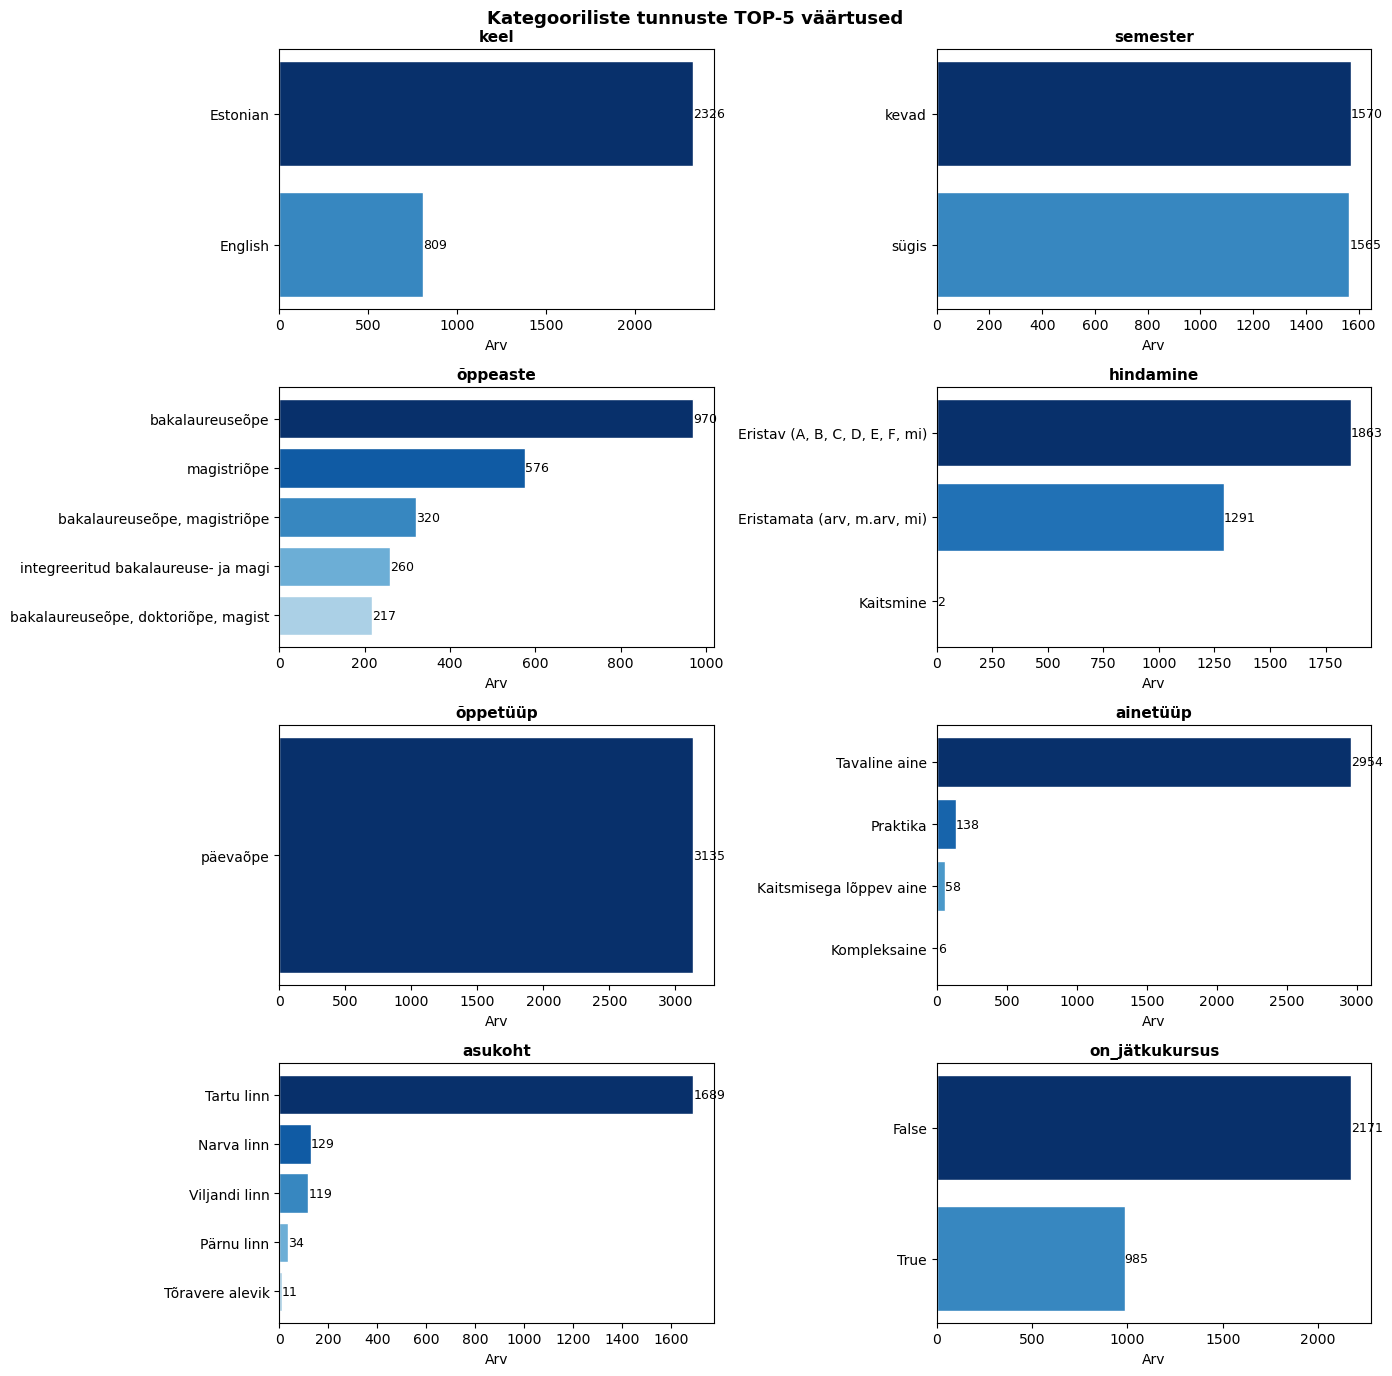

In [14]:
kategoorilised = ['keel', 'semester', 'õppeaste', 'hindamine', 
                  'õppetüüp', 'ainetüüp', 'asukoht', 'on_jätkukursus']

# Filtreeri ainult need veerud, mis tegelikult df-s eksisteerivad
kategoorilised = [v for v in kategoorilised if v in df_final.columns]

print("=" * 65)
print("  KATEGOORILISTE TUNNUSTE ENIM LEVINUD VÄÄRTUSED (TOP 5)")
print("=" * 65)
if len(kategoorilised) == 0:
    print("  ⚠️  Ühtegi kategoorilist veergu ei leitud! Kontrolli veergude nimesid.")
else:
    n = len(kategoorilised)
    ncols = 2
    nrows = (n + 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3.5 * nrows))
    # axes alati 2D listina
    if nrows == 1:
        axes = [axes] if ncols == 1 else list(axes)
    else:
        axes = [ax for row in axes for ax in row]

    for i, tunnus in enumerate(kategoorilised):
        top5 = df_final[tunnus].value_counts().head(5)
        kokku = df_final[tunnus].count()

        print(f"\n  ▸ {tunnus.upper()}  (kokku {kokku} mitte-tühja väärtust)")
        print(f"  {'Väärtus':<40} {'Arv':>6}  {'%':>6}")
        print(f"  {'─'*40} {'──────':>6}  {'──────':>6}")
        for v, cnt in top5.items():
            pct = cnt / kokku * 100 if kokku > 0 else 0
            print(f"  {str(v):<40} {cnt:>6}  {pct:>5.1f}%")

        ax = axes[i]
        colors = plt.cm.Blues_r([x / (len(top5) + 1) for x in range(len(top5))])
        bars = ax.barh(
            [str(v)[:35] for v in top5.index],
            top5.values,
            color=colors,
            edgecolor="white"
        )
        ax.set_title(tunnus, fontweight="bold", fontsize=11)
        ax.set_xlabel("Arv")
        ax.invert_yaxis()
        for bar, cnt in zip(bars, top5.values):
            ax.text(
                bar.get_width() + 0.3,
                bar.get_y() + bar.get_height() / 2,
                str(cnt), va="center", fontsize=9
            )

            # Peida tühjad subplotid
    for j in range(len(kategoorilised), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle("Kategooriliste tunnuste TOP-5 väärtused", fontsize=13, fontweight="bold")
    plt.tight_layout()
    plt.show()



In [18]:
OTSITAV = "Sissejuhatus andmeteadusesse"

# Leia õige veerg aine nimega
nimi_veerg = None
for kandidaat in ['nimi_et']:
    if kandidaat in df_final.columns:
        nimi_veerg = kandidaat
        break

print("\n" + "=" * 65)
print(f'  AINE: "{OTSITAV}"')
print("=" * 65)

if nimi_veerg is None:
    print("  ⚠️  Aine nimetuse veergu ei leitud! Saadaval veerud:", list(df.columns))
else:
    aine_df = df_final[df_final[nimi_veerg].str.contains(OTSITAV, case=False, na=False)]

    if aine_df.empty:
        print(f"\n  ⚠️  Ainet '{OTSITAV}' ei leitud veerus '{nimi_veerg}'.")
        print(f"  Kontroll: unikaalsed väärtused (esimesed 10):")
        print(f"  {list(df[nimi_veerg].dropna().unique()[:10])}")
    else:
        def safeget(rida, veerg):
            """Tagasta väärtus või '—' kui puudub."""
            if veerg not in rida.index:
                return "—"
            v = rida[veerg]
            if pd.isna(v) or str(v).strip() in ("", "nan"):
                return "—"
            return str(v).strip()

        def wrap_text(tekst, laius=60):
            """Murra tekst ridadeks."""
            return [tekst[i:i+laius] for i in range(0, len(tekst), laius)]

        def prindi_aine(rida):
            SEP = "─" * 63

            # Päis
            print(f"\n╔{SEP}╗")
            print(f"║  📘 AINE INFO{' '*49}║")
            print(f"╠{SEP}╣")

            # Lühiväljad
            lyhikesed = [
                ("Nimi (ET)",      safeget(rida, 'nimi_et')),
                ("Nimi (EN)",      safeget(rida, 'nimi_en')),
                ("Kood",           safeget(rida, 'aine_kood')),
                ("EAP",            safeget(rida, 'eap')),
                ("Semester",       safeget(rida, 'semester')),
                ("Keel",           safeget(rida, 'keel')),
                ("Õppeaste",       safeget(rida, 'õppeaste')),
                ("Hindamine",      safeget(rida, 'hindamine')),
                ("Õppetüüp",       safeget(rida, 'õppetüüp')),
                ("Ainetüüp",       safeget(rida, 'ainetüüp')),
                ("Kestvus",        safeget(rida, 'kestvus_semestrites')),
                ("Jätkukursus",    safeget(rida, 'on_jätkukursus')),
                ("Asukoht",        safeget(rida, 'asukoht')),
                ("Õppejõud",       safeget(rida, 'oppejoud')),
                ("Toimumisajad",   safeget(rida, 'toimumisajad')),
                ("Eeldusained",    safeget(rida, 'eeldusained')),
            ]

            for silt, vaartus in lyhikesed:
                read = wrap_text(vaartus, 44)
                print(f"║  {silt:<16}: {read[0]:<44}║")
                for rida_tekst in read[1:]:
                    print(f"║  {'':16}  {rida_tekst:<44}║")

            # Pikad tekstiväljad
            pikad = [
                ("📋 Kirjeldus",          safeget(rida, 'kirjeldus')),
                ("🎯 Õpiväljundid",       safeget(rida, 'õpiväljundid')),
                ("📝 Hindamisinfo",       safeget(rida, 'hindamine_info')),
                ("✅ Hindamiskriteerium", safeget(rida, 'hindamis_kriteerium')),
            ]

            for silt, tekst in pikad:
                if tekst != "—":
                    print(f"╠{SEP}╣")
                    print(f"║  {silt:<61}║")
                    print(f"╠{SEP}╣")
                    näita = tekst[:600]
                    for rida_tekst in wrap_text(näita, 61):
                        print(f"║  {rida_tekst:<61}║")
                    if len(tekst) > 600:
                        print(f"║  ... [{len(tekst)} tähemärki kokku]{' '*30}║")

            print(f"╚{SEP}╝")

        for _, rida in aine_df.iterrows():
            prindi_aine(rida)


  AINE: "Sissejuhatus andmeteadusesse"

╔───────────────────────────────────────────────────────────────╗
║  📘 AINE INFO                                                 ║
╠───────────────────────────────────────────────────────────────╣
║  Nimi (ET)       : Sissejuhatus andmeteadusesse                ║
║  Nimi (EN)       : Introduction to Data Science                ║
║  Kood            : LTAT.02.002                                 ║
║  EAP             : 6.0                                         ║
║  Semester        : sügis                                       ║
║  Keel            : English                                     ║
║  Õppeaste        : bakalaureuseõpe, magistriõpe                ║
║  Hindamine       : Eristav (A, B, C, D, E, F, mi)              ║
║  Õppetüüp        : päevaõpe                                    ║
║  Ainetüüp        : Tavaline aine                               ║
║  Kestvus         : 1                                           ║
║  Jätkukursus     : True

In [21]:
print("\n" + "=" * 65)
print("  TUNNUS 'kirjeldus_tekst' – KÕIK VEERUD ÜHENDATUD")
print("=" * 65)

kirjeldus_veerud = [
    'aine_kood', 'nimi_et', 'nimi_en', 'eap', 'semester',
    'keel', 'õppeaste', 'hindamine', 'õppetüüp', 'ainetüüp',
    'kestvus_semestrites', 'on_jätkukursus', 'asukoht',
    'oppejoud', 'toimumisajad', 'eeldusained',
    'kirjeldus', 'õpiväljundid', 'hindamine_info', 'hindamis_kriteerium'
]
kirjeldus_veerud = [v for v in kirjeldus_veerud if v in df_final.columns]

def loo_kirjeldus(rida):
    osad = []
    for veerg in kirjeldus_veerud:
        v = rida[veerg]
        if pd.notna(v) and str(v).strip() not in ("", "nan"):
            osad.append(f"{veerg}: {str(v).strip()}")
    return " | ".join(osad)

# Kasuta ainult df_final – ära sega df ja df_final
df_final["kirjeldus_tekst"] = df_final.apply(loo_kirjeldus, axis=1)
df_final["kirjeldus_pikkus"] = df_final["kirjeldus_tekst"].str.len()

# Näide
print(f"\n  Näide (esimene rida, 400 tähemärki):")
print(f"  {df_final['kirjeldus_tekst'].iloc[0][:400]}...\n")



  TUNNUS 'kirjeldus_tekst' – KÕIK VEERUD ÜHENDATUD

  Näide (esimene rida, 400 tähemärki):
  aine_kood: OIEO.06.046 | nimi_et: Rahvusvaheline eraõigus | nimi_en: Private International Law | eap: 6.0 | semester: kevad | keel: Estonian | õppeaste: magistriõpe | hindamine: Eristav (A, B, C, D, E, F, mi) | õppetüüp: päevaõpe | ainetüüp: Tavaline aine | kestvus_semestrites: 1 | on_jätkukursus: False | asukoht: Tartu linn | oppejoud: Gea Lepik | kirjeldus: Kursuse raames käsitletakse rahvusvahe...



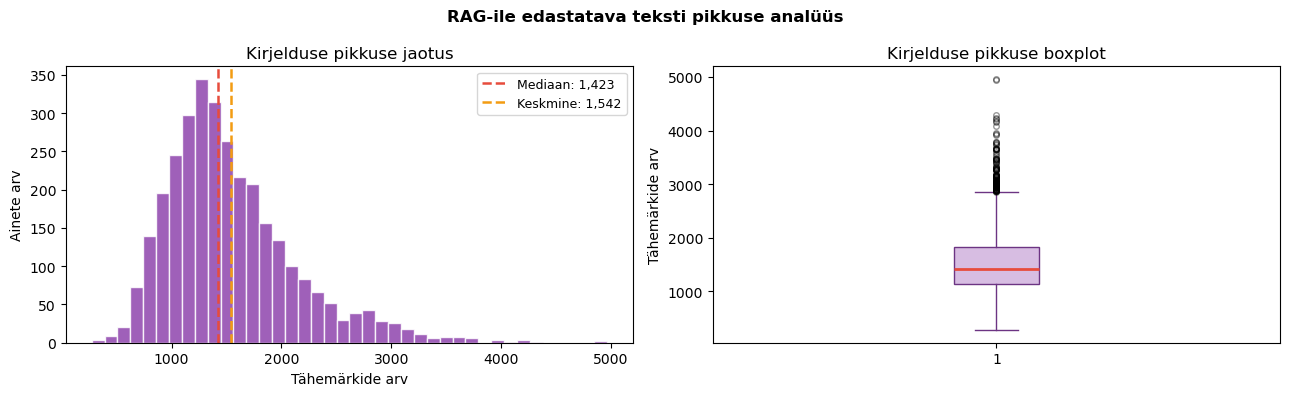


  'kirjeldus_tekst' lisatud df_final-i (3156 rida).
  Keskmine chunk: ~1,542 tähemärki  |  Max: 4,964  |  Min: 273


In [22]:
# Visualiseerimine
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.hist(df_final["kirjeldus_pikkus"].dropna(), bins=40,
         color="#8e44ad", edgecolor="white", alpha=0.85)
ax1.axvline(df_final["kirjeldus_pikkus"].median(), color="#e74c3c",
            linestyle="--", linewidth=1.8,
            label=f"Mediaan: {df_final['kirjeldus_pikkus'].median():,.0f}")
ax1.axvline(df_final["kirjeldus_pikkus"].mean(), color="#f39c12",
            linestyle="--", linewidth=1.8,
            label=f"Keskmine: {df_final['kirjeldus_pikkus'].mean():,.0f}")
ax1.set_xlabel("Tähemärkide arv")
ax1.set_ylabel("Ainete arv")
ax1.set_title("Kirjelduse pikkuse jaotus")
ax1.legend(fontsize=9)

ax2.boxplot(df_final["kirjeldus_pikkus"].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor="#d7bde2", color="#6c3483"),
            medianprops=dict(color="#e74c3c", linewidth=2),
            whiskerprops=dict(color="#6c3483"),
            capprops=dict(color="#6c3483"),
            flierprops=dict(marker="o", color="#e74c3c", alpha=0.4, markersize=4))
ax2.set_ylabel("Tähemärkide arv")
ax2.set_title("Kirjelduse pikkuse boxplot")

plt.suptitle("RAG-ile edastatava teksti pikkuse analüüs", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

print(f"\n  'kirjeldus_tekst' lisatud df_final-i ({len(df_final)} rida).")
print(f"  Keskmine chunk: ~{df_final['kirjeldus_pikkus'].mean():,.0f} tähemärki  |  "
      f"Max: {df_final['kirjeldus_pikkus'].max():,}  |  Min: {df_final['kirjeldus_pikkus'].min():,}")
